In [697]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cross_validation import train_test_split

from math import sqrt
from sklearn import metrics
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from sklearn.grid_search import GridSearchCV

from sklearn.model_selection import cross_val_score

In [698]:
data = pd.read_csv("sample.csv")
df = pd.DataFrame(data)

# Exploratory Data Analysis

We start our exploratory data analysis by checking which are our columns and how our data looks in them. We are dealing with 7 independent variables and 1 dependent (target) variable. 

In [699]:
print df.head()
print df.tail()

  loc1 loc2  para1  dow  para2    para3  para4   price
0    0    1      1  Mon    662   3000.0    3.8   73.49
1    9   99      1  Thu    340   2760.0    9.2  300.00
2    0    4      0  Mon     16   2700.0    3.0  130.00
3    4   40      1  Mon     17  12320.0    6.4  365.00
4    5   50      1  Thu    610   2117.0   10.8  357.50
     loc1 loc2  para1  dow  para2   para3  para4   price
9995    9   98      3  Fri    386  5000.0   12.0  460.00
9996    7   74      1  Thu    386  3250.0    8.0  325.00
9997    0    6      0  Tue    190  8856.0    5.6  133.33
9998    7   74      3  Fri    717  5000.0   13.6  820.00
9999    7   75      1  Thu    622   336.0    4.8  375.00


In [700]:
data.dtypes

loc1      object
loc2      object
para1      int64
dow       object
para2      int64
para3    float64
para4    float64
price    float64
dtype: object

In [701]:
df.describe()

,para1,para2,para3,para4,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.380800,447.384000,9547.989920,8.459522,433.733056
std,3.500831,221.005861,8022.814037,4.613526,277.435947
min,0.000000,16.000000,200.000000,1.000000,50.730000
25%,1.000000,301.000000,2898.000000,4.000000,250.000000
50%,1.000000,434.000000,6447.000000,7.200000,370.000000
75%,1.000000,582.000000,15000.000000,13.600000,550.000000
max,337.000000,2554.000000,34782.000000,27.200000,5700.000000


In [702]:
df.mode()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,2,21,1,Wed,16,24000.0,13.6,400.0


In [703]:
df.nunique()

loc1       12
loc2      107
para1      13
dow         7
para2    1016
para3    4359
para4     243
price     932
dtype: int64

We have 3 numerical attributes: para2, para3, para4 and 4 categarical variables: loc1, loc2, para1 and dow. para1 seems to contain some outliers, because the max value is 337 while the mean remains very small, specifically 1.38. We will clarify this in the next steps.  

In [704]:
cols = ['loc1', 'loc2', 'para1', 'dow']
for col in cols:
    print col
    print df[col].value_counts()

loc1
2    1607
0    1486
1    1223
7    1081
3     945
5     846
4     773
8     727
9     690
6     620
T       1
S       1
Name: loc1, dtype: int64
loc2
21    499
6     454
74    329
12    273
14    246
1     241
22    226
50    217
23    215
89    194
9     192
4     180
15    168
20    168
67    167
16    166
31    160
28    149
19    149
39    146
59    142
47    139
8     137
99    133
85    130
13    128
49    127
90    127
76    123
63    119
     ... 
36     43
26     43
46     42
81     40
10     39
5      38
92     37
94     35
96     35
65     34
60     31
17     28
98     25
84     24
18     24
69     15
80     11
61     10
82      9
62      5
11      2
0C      1
0T      1
0B      1
43      1
0N      1
0L      1
TS      1
S6      1
0       1
Name: loc2, Length: 107, dtype: int64
para1
1      7052
3      1613
0       836
2       268
4       164
5        51
6         6
7         3
13        2
9         2
337       1
24        1
8         1
Name: para1, dtype: int64
dow
Wed  

We explore the frequency of items in the categorical columns. loc1 and loc2 columns seem to contain some erroneous values, such as 'S', 'T', respectively '0C', '0T', '0B', '0N', '0L', 'TS', 'S6', which we will discard in the next step as we don't know how the data was collected or the values represent a code for something.       
      

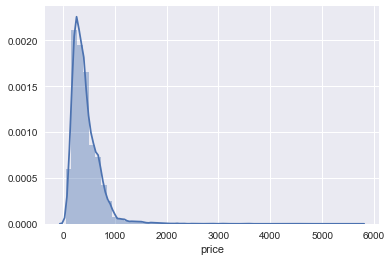

Skewness: 3.619455
Kurtosis: 33.783285


In [705]:
sns.distplot(df.price);
plt.show()

print("Skewness: %f" % df.price.skew())
print("Kurtosis: %f" % df.price.kurt())

The distribution of the target variable is skewed to the left. To obtain a normal distribution we will need to apply log to the price column. 

Are loc1 and loc2 correlated? Because of the way the data is loaded, if 0 is the first digit in loc2, it disappers. In the sample dataset, the digit of loc1 is always the same as the first digit from loc2.

In [706]:
for index,row in df.iterrows():
    if (row['loc1'][0] != row['loc2'][0]):
        print str(row['loc1'][0]) + " different from " + str(row['loc2'])

0 different from 1
0 different from 4
0 different from 3
0 different from 9
0 different from 1
0 different from 1
0 different from 1
0 different from 8
0 different from 6
0 different from 9
0 different from 1
0 different from 6
0 different from 6
0 different from 1
0 different from 2
0 different from 6
0 different from 1
0 different from 6
0 different from 2
0 different from 6
0 different from 1
0 different from 3
0 different from 6
0 different from 9
0 different from 6
0 different from 3
0 different from 4
0 different from 6
0 different from 6
0 different from 6
0 different from 6
0 different from 1
0 different from 3
0 different from 6
0 different from 9
0 different from 8
0 different from 6
0 different from 9
0 different from 9
0 different from 1
0 different from 9
0 different from 2
0 different from 8
0 different from 1
0 different from 2
0 different from 4
0 different from 6
0 different from 3
0 different from 6
0 different from 1
0 different from 2
0 different from 6
0 different 

0 different from 6
0 different from 6
0 different from 9
0 different from 3
0 different from 6
0 different from 6
0 different from 3
0 different from 9
0 different from 6
0 different from 1
0 different from 1
0 different from 1
0 different from 1
0 different from 6
0 different from 1
0 different from 1
0 different from 5
0 different from 1
0 different from 4
0 different from 7
0 different from 1
0 different from 7
0 different from 6
0 different from 6
0 different from 1
0 different from 8
0 different from 9
0 different from 9
0 different from 8
0 different from 1
0 different from 6
0 different from 6
0 different from 9
0 different from 6
0 different from 6
0 different from 7
0 different from 2
0 different from 6
0 different from 2
0 different from 3
0 different from 7
0 different from 4
0 different from 6
0 different from 1
0 different from 9
0 different from 1
0 different from 1
0 different from 1
0 different from 6
0 different from 8
0 different from 6
0 different from 7
0 different 

0 different from 4
0 different from 4
0 different from 6
0 different from 6
0 different from 6
0 different from 1
0 different from 2
0 different from 6
0 different from 7
0 different from 1
0 different from 9
0 different from 7
0 different from 4
0 different from 1
0 different from 3
0 different from 8
0 different from 3
0 different from 1
0 different from 9
0 different from 9
0 different from 6
0 different from 6
0 different from 7
0 different from 1
0 different from 3
0 different from 1
0 different from 8
0 different from 9
0 different from 1
0 different from 4
0 different from 6
0 different from 6
0 different from 6
0 different from 1
0 different from 7
0 different from 6
0 different from 8
0 different from 2
0 different from 4
0 different from 4
0 different from 6
0 different from 7
0 different from 9
0 different from 9
0 different from 4
0 different from 4
0 different from 6
0 different from 1
0 different from 6
0 different from 6
0 different from 9
0 different from 8
0 different 

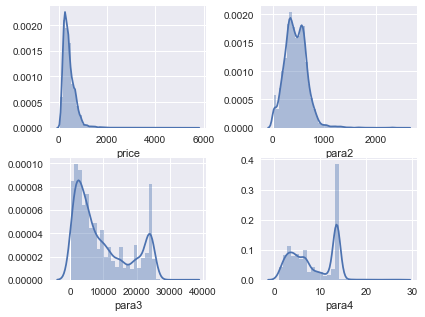

In [707]:
plt.subplot(221)
sns.distplot(df.price);

plt.subplot(222)
sns.distplot(df.para2);

plt.subplot(223)
sns.distplot(df.para3);

plt.subplot(224)
sns.distplot(df.para4);

plt.subplots_adjust(top=0.95, bottom=0.0, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

para2's distribution is skewed to the right, para3 and para4 display bimodal distributions (the 2 peaks in the 2 different columns might indicate the presence of 2 groups). 

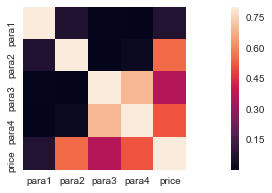

In [708]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 3))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

para4 and para2 seem to have the strongest correlation to price. 

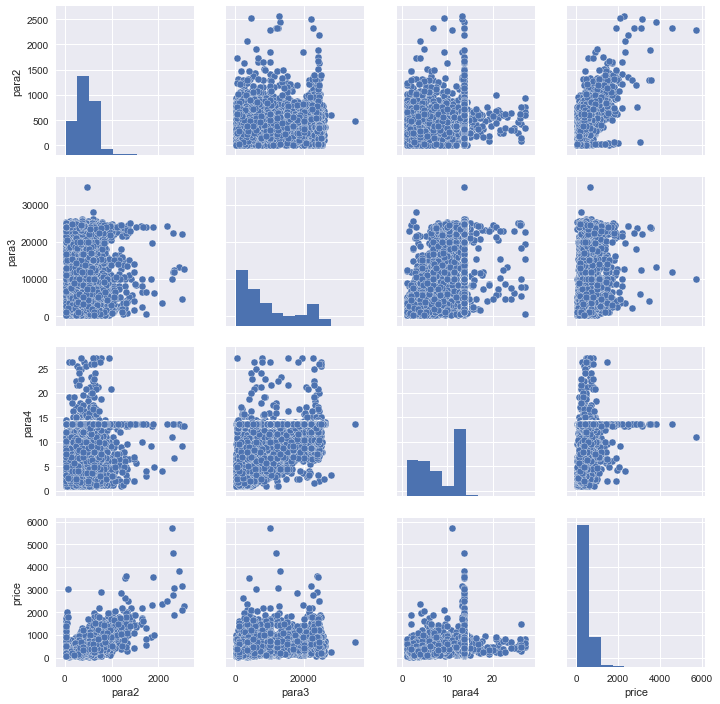

In [709]:
#scatterplot
sns.set()
sns.pairplot(df[['para2','para3','para4', 'price']], size = 2.5)
plt.show();

The pairplot shows the relations between all pairs of attributes. It is hard to tell if there is a linea relationship as there is a lot of noise in the data. 

# Data Preparation

In this step we will handle the erroneous data, find and remove outliers and encode the categorical data. 

We learned in the EDA step that loc1 is the same first digit of loc2. In order to avoid redundant data, we drop loc1. 

In [710]:
df = df.drop('loc1', 1)

We look at columns loc1 and loc2, and remove the rows that contain literals in either column.

In [711]:
#parse data to check if the type of all elements in column is int
def parse(x):
    try:
        return int(x)
    except ValueError:
        #print x
        return np.nan

In [712]:
# replace all elements of column loc1 which are not int, with NaN
df.loc2 = df.loc2.apply(parse)

df[df.isnull().any(axis=1)]

,loc2,para1,dow,para2,para3,para4,price
2887,NaN,2,Mon,801,1091.0,9.0,1350.0
3026,NaN,3,Fri,1289,24000.0,13.6,850.0
4850,NaN,2,Mon,1473,4000.0,2.0,1890.0
5510,NaN,3,Fri,1472,1600.0,2.0,440.0
5647,NaN,2,Wed,1127,10000.0,13.6,750.0
7751,NaN,3,Fri,623,1500.0,6.0,400.0
8466,NaN,3,Fri,1298,3500.0,2.1,1500.0


In [713]:
df = df.dropna()
df.describe()

,loc2,para1,para2,para3,para4,price
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,42.468028,1.379966,446.888522,9550.105894,8.460614,433.318379
std,29.350079,3.501891,220.141080,8022.655794,4.613156,276.743453
min,0.000000,0.000000,16.000000,200.000000,1.000000,50.730000
25%,16.000000,1.000000,301.000000,2900.000000,4.000000,250.000000
50%,37.000000,1.000000,434.000000,6448.000000,7.200000,370.000000
75%,69.000000,1.000000,582.000000,15000.000000,13.600000,550.000000
max,99.000000,337.000000,2554.000000,34782.000000,27.200000,5700.000000


In 13 cases out of 10000 transactions happened during the weekend (10 on Sat and 3 on Sun). These seem like exceptions so we will remove the entries in which dow=Sat or dow=Sun.         

In [714]:
exclude = ('Sat', 'Sun')
df = df.query('dow not in @exclude')

We will check for outliers. 

For outlier detection we cannot use parametric methods (such as z-score) as we've seen that the distribution of the numerical variables are not Gaussian. We will need to apply non-parametric methods (like dbscan or isolation forest). 

In [715]:
train = df[['para1','para2','para3','para4','price']]

clf = IsolationForest(max_samples=100)
clf.fit(train)
y = clf.predict(train)

In [716]:
#add a new column that flags the outliers 
df_wo_outliers = df.copy()
df_wo_outliers['scores']= y

In [717]:
df_wo_outliers = df_wo_outliers.query('scores != -1')

df_wo_outliers.describe()

,loc2,para1,para2,para3,para4,price,scores
count,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.0
mean,42.979960,1.236250,432.617791,9344.394834,8.307342,401.907198,1.0
std,29.200768,0.786867,172.464883,7910.591313,4.544348,193.161860,0.0
min,0.000000,0.000000,16.000000,200.000000,1.000000,50.730000,1.0
25%,19.000000,1.000000,306.000000,2850.000000,4.000000,250.000000,1.0
50%,38.000000,1.000000,427.000000,6160.000000,7.000000,360.000000,1.0
75%,70.000000,1.000000,566.000000,15000.000000,13.600000,520.000000,1.0
max,99.000000,6.000000,960.000000,34782.000000,27.200000,1250.000000,1.0


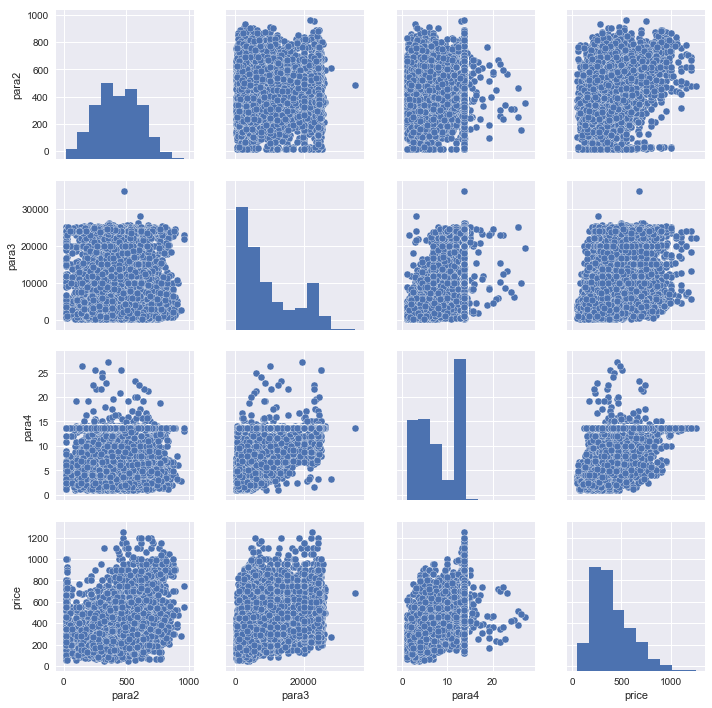

In [718]:
sns.set()
sns.pairplot(df_wo_outliers[['para2', 'para3', 'para4', 'price']], size = 2.5)
plt.show();

loc2, dow and para1 are categorical variables, so we will use OneHotEncoder on them. We cannot use LabelEncoder as it encodes the items with integers which will afterwards display linear correlation. 

In [719]:
para1_encoded = OneHotEncoder().fit_transform(np.expand_dims(df_wo_outliers["para1"], 1)).todense() 

loc2_encoded = OneHotEncoder().fit_transform(np.expand_dims(df_wo_outliers["loc2"], 1)).todense()

dow_label = LabelEncoder().fit_transform(df_wo_outliers["dow"])
dow_encoded  = OneHotEncoder().fit_transform(np.expand_dims(dow_label,  1)).todense()

# Data Transformation

StandardScaler will be used only for linear regression. 
MinMaxScaler is applied after removign outliers (as it is sensitive to outliers).

In [720]:
numerical_df_wo_outliers = df_wo_outliers[["para2", "para3", "para4"]].values

In [721]:
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

scaled_minmax =  minmax_scaler.fit_transform(numerical_df_wo_outliers)
scaled_std = std_scaler.fit_transform(numerical_df_wo_outliers)

In [722]:
df_minmax = np.concatenate([loc2_encoded, para1_encoded, dow_encoded, scaled_minmax], axis=1)
df_std = np.concatenate([ loc2_encoded, para1_encoded, dow_encoded, scaled_std], axis=1)

# Model Fitting

labels2 will be used for linear regression. as it is skewed we need normalize it by applying log. 

In [723]:
labels= df_wo_outliers.price
labels2 = np.log10(df_wo_outliers.price.values)

Both the data that was scaled with MinMaxScaler and StandardScaler are split into a train and test set. Results may vary as shuffle is used for splitting the dataset.

In [724]:
x_train_mimax, x_test_mimax, y_train, y_test = train_test_split(df_minmax, labels, test_size=0.33, random_state=0)
     
x_train_std, x_test_std, y_train_std, y_test_std,  = train_test_split(df_std, labels2, test_size=0.33, random_state=0)

The following models are fit: Kernel Ridge Regression, Support Vector Regressor, Linear Regression, XGBRegressor. RMSE is used as a measure of performance as  it shows how close the observed data points are to the models predicted values.

In [725]:
clf = KernelRidge(alpha=1.0)
clf.fit(x_train_mimax, y_train) 


scores = cross_val_score(clf, x_train_mimax, y_train, scoring='neg_mean_squared_error', cv=10)
svr.fit(x_train_mimax, y_train)

print "Kernel Ridge Regression"
print "Fit a model X_train, and calculate RMSE with X_train, Y_train:" + str(np.sqrt(-scores.mean()))
print "Fit a model X_train, and calculate RMSE with X_test, Y_test:" + str(np.sqrt(metrics.mean_squared_error(y_test, clf.predict(x_test_mimax))))

Kernel Ridge Regression
Fit a model X_train, and calculate RMSE with X_train, Y_train:122.006774307
Fit a model X_train, and calculate RMSE with X_test, Y_test:120.189111674


In [726]:
svr = SVR(kernel='linear')

scores = cross_val_score(svr, x_train_mimax, y_train, scoring='neg_mean_squared_error', cv=10)
svr.fit(x_train_mimax, y_train)

print "Support Vector Regressor"
print "Fit a model X_train, and calculate RMSE with X_train, Y_train:" + str(np.sqrt(-scores.mean()))
print "Fit a model X_train, and calculate RMSE with X_test, Y_test:" + str(np.sqrt(metrics.mean_squared_error(y_test, svr.predict(x_test_mimax))))

Support Vector Regressor
Fit a model X_train, and calculate RMSE with X_train, Y_train:141.487573015
Fit a model X_train, and calculate RMSE with X_test, Y_test:136.557771227


In [727]:
reg = LinearRegression() 

scores = cross_val_score(reg, x_train_std, y_train_std, scoring='neg_mean_squared_error', cv=10)
reg.fit(x_train_std, y_train_std)

print "Linear Regression"
#print "Fit a model X_train, and calculate RMSE with X_train, Y_train:" + str(np.sqrt(-scores.mean()))
print "Fit a model X_train, and calculate RMSE with X_train, Y_train:" + str(np.sqrt(metrics.mean_squared_error(10**y_train_std, 10**reg.predict(x_train_std))))
print "Fit a model X_train, and calculate RMSE with X_test, Y_test:" + str(np.sqrt(metrics.mean_squared_error(10**y_test_std, 10**reg.predict(x_test_std))))

Linear Regression
Fit a model X_train, and calculate RMSE with X_train, Y_train:119.451089516
Fit a model X_train, and calculate RMSE with X_test, Y_test:118.080221254


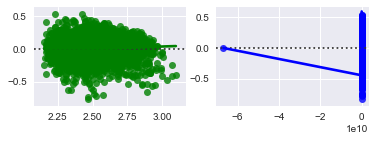

In [728]:
plt.subplot(221)
sns.residplot(reg.predict(x_train_std), y_train_std, lowess=True, color="g")
plt.subplot(222)
sns.residplot(reg.predict(x_test_std), y_test_std, lowess=True, color="b")
plt.show()

In [729]:
params = {
    "max_depth": [3, 4, 5, 6, 7],
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.03, 0.05, 0.1, 0.3, 0.5]
}

xgb = XGBRegressor()
grid = GridSearchCV(xgb, param_grid=params, verbose=True, n_jobs=24)
grid.fit(x_train_mimax, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    4.2s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:  6.9min
[Parallel(n_jobs=24)]: Done 402 tasks      | elapsed: 17.1min
[Parallel(n_jobs=24)]: Done 450 out of 450 | elapsed: 19.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=24,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5], 'max_depth': [3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [730]:
print(grid.score(x_test_mimax, y_test))
print(grid.best_params_)

0.689793675064
{'n_estimators': 500, 'learning_rate': 0.03, 'max_depth': 5}


In [731]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=5)

scores = cross_val_score(xgb, x_train_mimax, y_train, scoring='neg_mean_squared_error',cv=10)
xgb.fit(x_train_mimax, y_train)

print "XGBRegressor"
print "Fit a model X_train, and calculate RMSE with X_train, Y_train:" + str(np.sqrt(-scores.mean()))
print "Fit a model X_train, and calculate RMSE with X_test, Y_test:" + str(np.sqrt(metrics.mean_squared_error(y_test, xgb.predict(x_test_mimax))))

XGBRegressor
Fit a model X_train, and calculate RMSE with X_train, Y_train:107.952594216
Fit a model X_train, and calculate RMSE with X_test, Y_test:106.461805913


XGBRegressor has performed best, having the smallest RMSE.